In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
import urllib.request
import os.path
import gzip
import pickle
import os
import numpy as np
import sys,os

file_path = ['./train-images-idx3-ubyte.gz','./train-labels-idx1-ubyte.gz','./t10k-images-idx3-ubyte.gz','./t10k-labels-idx1-ubyte.gz']

def file_load(path):
  if path.find('images') != -1:
    with gzip.open(path, 'rb') as f:
      data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 784)
    return data
  else:
    with gzip.open(path, 'rb') as f:
      labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

dataset = {}
dataset['train_img'] =  file_load(file_path[0])
dataset['train_label'] = file_load(file_path[1])    
dataset['test_img'] = file_load(file_path[2])
dataset['test_label'] = file_load(file_path[3])


#normalize 
dataset['train_img'] = dataset['train_img'].astype(np.float32)
dataset['train_img'] /= 255.0
dataset['test_img'] = dataset['test_img'].astype(np.float32)
dataset['test_img'] /= 255.0
#one_hot_label
T = np.zeros((dataset['train_label'].size, 10))
for idx, row in enumerate(T):
  row[dataset['train_label'][idx]] = 1
dataset['train_label'] =T
T = np.zeros((dataset['test_label'].size, 10))
for idx, row in enumerate(T):
  row[dataset['test_label'][idx]] = 1
dataset['test_label'] =T

(X_train, Y_train), (X_test, Y_test) = (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 
#(X_train, Y_train), (X_test, Y_test) = load_mnist(normalize=True, one_hot_label=True)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)


In [3]:
import random
def validation_(X_train, n=0.2):
  #X_train = random.shuffle(X_train)
  num = int(X_train.shape[0] * 0.2)
  print(num)
  return X_train[num:], X_train[:num], Y_train[num:], Y_train[:num] #train, vallidation

X_train1, X_train_valid, Y_train1, Y_train_valid = validation_(X_train,n=0.2)
print(X_train1.shape, X_train_valid.shape)
print(Y_train1.shape, Y_train_valid.shape)

12000
(48000, 784) (12000, 784)
(48000, 10) (12000, 10)


In [4]:
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
X_train1, X_train_valid, Y_train1, Y_train_valid = validation_(X_train,n=0.2)
print(X_train1.shape, X_train_valid.shape)
print(Y_train1.shape, Y_train_valid.shape)

model = Sequential()
model.add(tf.keras.layers.Flatten()) #input layer #flatten
model.add(tf.keras.layers.Dense(784, activation=tf.nn.relu))#hidden_layer1
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))#hidden_layer2
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))#hidden_layer2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))#output_layer

#train_parameter
model.compile(optimizer=optimizers.SGD(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

run = model.fit(X_train1, Y_train1, epochs=20, batch_size=100, validation_data=(X_train_valid, Y_train_valid))

12000
(48000, 28, 28) (12000, 28, 28)
(48000,) (12000,)
Epoch 1/20
480/480 [==============================] - 1s 3ms/step - loss: 1.9388 - accuracy: 0.4677 - val_loss: 1.3058 - val_accuracy: 0.7637
Epoch 2/20
480/480 [==============================] - 1s 2ms/step - loss: 0.8622 - accuracy: 0.8080 - val_loss: 0.6002 - val_accuracy: 0.8444
Epoch 3/20
480/480 [==============================] - 1s 2ms/step - loss: 0.5239 - accuracy: 0.8595 - val_loss: 0.4461 - val_accuracy: 0.8819
Epoch 4/20
480/480 [==============================] - 1s 2ms/step - loss: 0.4184 - accuracy: 0.8842 - val_loss: 0.3777 - val_accuracy: 0.8959
Epoch 5/20
480/480 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8985 - val_loss: 0.3381 - val_accuracy: 0.9062
Epoch 6/20
480/480 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.9065 - val_loss: 0.3150 - val_accuracy: 0.9103
Epoch 7/20
480/480 [==============================] - 1s 2ms/step - loss: 0.3063 - accuracy:

In [5]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1770 - accuracy: 0.9483
0.177036851644516 0.9483000040054321


In [6]:
predictions = model.predict([X_test])

Consider rewriting this model with the Functional API.


In [7]:
print(predictions)

[[3.2820790e-06 5.8663030e-08 4.9319460e-05 ... 9.9895030e-01
  7.3490259e-07 3.3406686e-05]
 [4.3315685e-04 2.2172206e-03 9.8497713e-01 ... 2.7024656e-09
  5.4644834e-04 5.7695995e-09]
 [7.0865229e-07 9.9770892e-01 8.1746641e-04 ... 3.3075624e-04
  4.3352487e-04 2.5562946e-05]
 ...
 [1.5214786e-07 1.3656100e-06 1.1582716e-05 ... 2.2280867e-04
  6.0382858e-04 3.7281369e-03]
 [3.6749279e-04 4.0911573e-06 1.4778806e-06 ... 2.7262606e-06
  4.6795714e-03 6.6574432e-07]
 [1.0990658e-03 1.9492132e-08 1.6327674e-03 ... 1.1440147e-07
  3.5451553e-06 1.4191754e-07]]


In [8]:
print(Y_test)

[7 2 1 ... 4 5 6]


[[ 958    0    1    1    0    4    8    4    3    1]
 [   0 1113    4    0    0    1    4    1   12    0]
 [  11    2  960   13   11    0    5    9   19    2]
 [   1    0   10  951    1   13    2   11   16    5]
 [   1    0    7    0  937    0    8    3    4   22]
 [   8    1    3   20    1  825   15    0   12    7]
 [   8    2    2    1    8    9  925    0    3    0]
 [   3    5   19    5    6    0    0  965    2   23]
 [   5    2    2   14   10    6   13    7  908    7]
 [   9    7    2    9   20    0    1   11    9  941]]


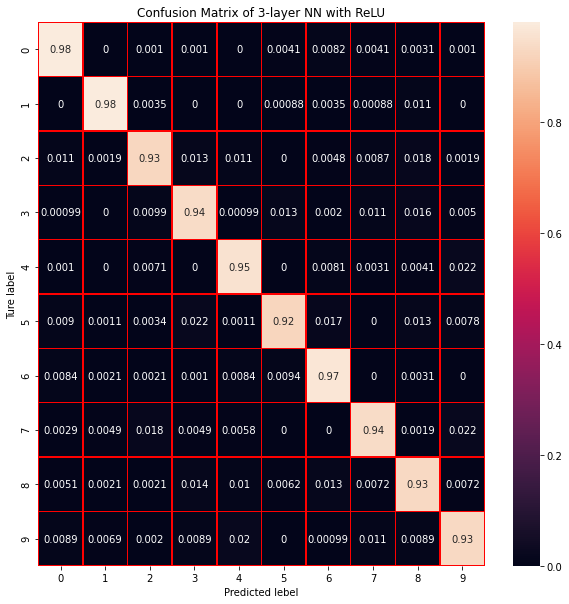

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, np.argmax(model.predict([X_test]), axis =1))
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm_normalized,annot=True,linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("Predicted lebel")
plt.ylabel("Ture label")
plt.title('Confusion Matrix of 3-layer NN with ReLU')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


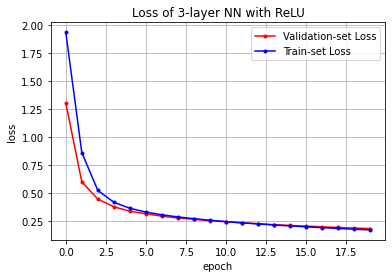

In [10]:
print(run.history.keys())
#plt.plot(run.history['accuracy'])
y_vloss = run.history['val_loss']
y_loss = run.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.title('Loss of 3-layer NN with ReLU')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
import matplotlib.pyplot as plt
import cv2
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import load_model
from keras import backend as K
from keras.preprocessing import image
import numpy as np
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.resnet50 import decode_predictions

In [12]:
#각종 함수들
def softmax(x):
    #if x.ndim == 2:
    x = x.T
    x = x - np.max(x, axis=0)
    y = np.exp(x) / np.sum(np.exp(x), axis=0)
    return y.T

[[3.2820790e-06 5.8663030e-08 4.9319460e-05 ... 9.9895030e-01
  7.3490259e-07 3.3406686e-05]
 [4.3315685e-04 2.2172206e-03 9.8497713e-01 ... 2.7024656e-09
  5.4644834e-04 5.7695995e-09]
 [7.0865229e-07 9.9770892e-01 8.1746641e-04 ... 3.3075624e-04
  4.3352487e-04 2.5562946e-05]
 ...
 [1.5214786e-07 1.3656100e-06 1.1582716e-05 ... 2.2280867e-04
  6.0382858e-04 3.7281369e-03]
 [3.6749279e-04 4.0911573e-06 1.4778806e-06 ... 2.7262606e-06
  4.6795714e-03 6.6574432e-07]
 [1.0990658e-03 1.9492132e-08 1.6327674e-03 ... 1.1440147e-07
  3.5451553e-06 1.4191754e-07]]
10 [[0.9999473, 0.99995935, 0.9999721], [0.9986601, 0.9989214, 0.99867], [0.9999553, 0.99995875, 0.9999738], [0.999895, 0.9998994, 0.9999126], [0.99986935, 0.99988973, 0.9999354], [0.99996114, 0.99991274, 0.9999132], [0.9998721, 0.9998846, 0.9998647], [0.99987686, 0.9998542, 0.9998952], [0.9995128, 0.9993954, 0.99937207], [0.998468, 0.9988557, 0.99919015]]
10 [[6133, 6114, 2536], [7005, 3648, 6375], [9131, 1890, 4870], [3515, 819, 9

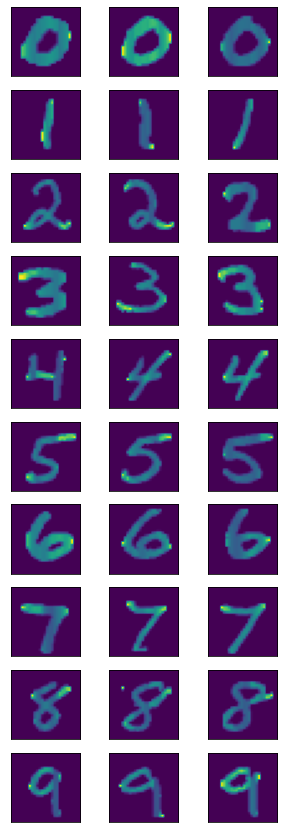

In [13]:
import matplotlib.pyplot as plt

pred_index = [ [0]*3 for i in range(10)]
hist = [ [0]*3 for i in range(10)]

def class_prior(X_test,Y_test):
  pred = model.predict([X_test])
  print(pred)
  for i in range(len(pred)):#처음부터시작
    if np.argmax(pred[i]) == Y_test[i]:
      if min(pred_index[Y_test[i]]) < pred[i][np.argmax(pred[i])]:
        pred_index[Y_test[i]][pred_index[Y_test[i]].index(min(pred_index[Y_test[i]]))] = pred[i][np.argmax(pred[i])] #확률 추가
        hist[Y_test[i]][pred_index[Y_test[i]].index(min(pred_index[Y_test[i]]))] = i #index
  print(len(pred_index), pred_index)
  print(len(hist), hist)
  new_hist = [ [0]*3 for i in range(10) ] 
  #역정렬
  for cl in range(len(pred_index)):
    new = sorted(pred_index[cl],reverse=True)
    for i in range(len(pred_index[cl])): #i가 원래 index
      new_index = new.index(pred_index[cl][i])
      new_hist[cl][new_index] = hist[cl][i]
  print(len(new_hist), new_hist)
        
  fig = plt.figure()#plt.subplots(figsize=(10,10))
  n = 1
  for i in new_hist:
    for j in range(len(i)):
      subplot = fig.add_subplot(10,3,n)
      n+=1
      image = X_test[i[j]].reshape((28,28))
      fig.set_figheight(15)
      fig.set_figwidth(5)
      subplot.imshow(image)
      # x, y 축의 지점 표시를 안함
      subplot.set_xticks([])
      subplot.set_yticks([])
  plt.show()

class_prior(X_test,Y_test)

In [19]:
import tensorflow as tf
import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
mnist = tf.keras.datasets.mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
X_train1, X_train_valid, Y_train1, Y_train_valid = validation_(X_train,n=0.2)
print(X_train1.shape, X_train_valid.shape)
print(Y_train1.shape, Y_train_valid.shape)

model = Sequential()
model.add(tf.keras.layers.Flatten()) #input layer #flatten
model.add(tf.keras.layers.Dense(784, activation=keras.layers.LeakyReLU(alpha=0.3)))#hidden_layer1
model.add(tf.keras.layers.Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))#hidden_layer2
model.add(tf.keras.layers.Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))#hidden_layer2
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))#output_layer

#train_parameter
model.compile(optimizer=optimizers.SGD(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

run = model.fit(X_train1, Y_train1, epochs=20, batch_size=100, validation_data=(X_train_valid, Y_train_valid))

12000
(48000, 28, 28) (12000, 28, 28)
(48000,) (12000,)
Epoch 1/20
480/480 [==============================] - 1s 3ms/step - loss: 1.8906 - accuracy: 0.5544 - val_loss: 1.1892 - val_accuracy: 0.7854
Epoch 2/20
480/480 [==============================] - 1s 2ms/step - loss: 0.7782 - accuracy: 0.8202 - val_loss: 0.5448 - val_accuracy: 0.8539
Epoch 3/20
480/480 [==============================] - 1s 2ms/step - loss: 0.4791 - accuracy: 0.8671 - val_loss: 0.4151 - val_accuracy: 0.8842
Epoch 4/20
480/480 [==============================] - 1s 2ms/step - loss: 0.3920 - accuracy: 0.8890 - val_loss: 0.3601 - val_accuracy: 0.8979
Epoch 5/20
480/480 [==============================] - 1s 2ms/step - loss: 0.3500 - accuracy: 0.8992 - val_loss: 0.3310 - val_accuracy: 0.9041
Epoch 6/20
480/480 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.9070 - val_loss: 0.3098 - val_accuracy: 0.9114
Epoch 7/20
480/480 [==============================] - 1s 2ms/step - loss: 0.3058 - accuracy:

In [20]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2044 - accuracy: 0.9394
0.2043936550617218 0.9394000172615051


Consider rewriting this model with the Functional API.
[[ 955    0    1    3    0    6    8    2    5    0]
 [   0 1111    4    0    1    2    3    0   14    0]
 [  10    4  940   18   14    0   12    9   24    1]
 [   2    0   10  943    1   18    4    8   17    7]
 [   1    2    6    0  936    0   12    2    4   19]
 [   8    1    5   24    6  805   18    0   18    7]
 [  13    2    5    0   14   12  905    0    7    0]
 [   3    3   23    7    7    0    0  952    2   31]
 [   5    4    3   15   10   10   11    6  905    5]
 [  10    7    1    8   28    2    1    8   10  934]]


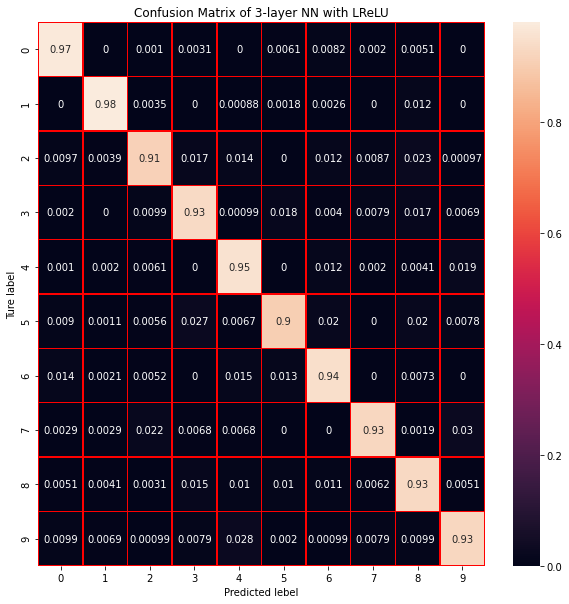

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, np.argmax(model.predict([X_test]), axis =1))
print(cm)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(10,10))
sns.heatmap(cm_normalized,annot=True,linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("Predicted lebel")
plt.ylabel("Ture label")
plt.title('Confusion Matrix of 3-layer NN with LReLU')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


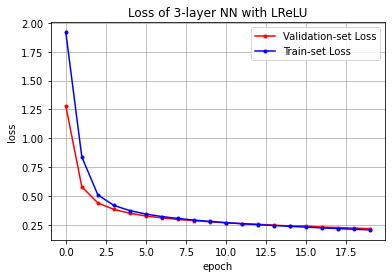

In [16]:

print(run.history.keys())
#plt.plot(run.history['accuracy'])
y_vloss = run.history['val_loss']
y_loss = run.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.title('Loss of 3-layer NN with LReLU')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

[[1.49041271e-05 9.12177178e-09 8.33257000e-05 ... 9.97517943e-01
  1.32320883e-06 1.37299125e-04]
 [2.07287143e-04 4.71651729e-04 9.70254838e-01 ... 1.62116742e-09
  4.78394853e-04 4.84507501e-09]
 [7.78570666e-08 9.97378826e-01 1.27630134e-03 ... 1.48037361e-04
  3.93281312e-04 6.58099525e-05]
 ...
 [9.38454576e-08 2.87010357e-06 1.32174055e-05 ... 3.03695473e-04
  9.30916285e-04 4.81834030e-03]
 [5.46739320e-04 8.39444401e-05 2.17044417e-05 ... 5.36357163e-07
  1.48866773e-02 8.41314522e-06]
 [4.50092426e-04 1.11118963e-08 1.87651941e-03 ... 1.73636394e-07
  2.14290208e-06 7.44573612e-08]]
10 [[0.9999615, 0.99993527, 0.99993503], [0.9988165, 0.9988734, 0.99884963], [0.9999646, 0.9999685, 0.99995506], [0.9999374, 0.99989545, 0.99989986], [0.999828, 0.9998017, 0.99983156], [0.99981004, 0.9997404, 0.99971634], [0.99977225, 0.99979895, 0.9997714], [0.99983656, 0.9997892, 0.9998758], [0.9994879, 0.99952054, 0.99955076], [0.99869627, 0.99954116, 0.99924785]]
10 [[6114, 6133, 8067], [6829,

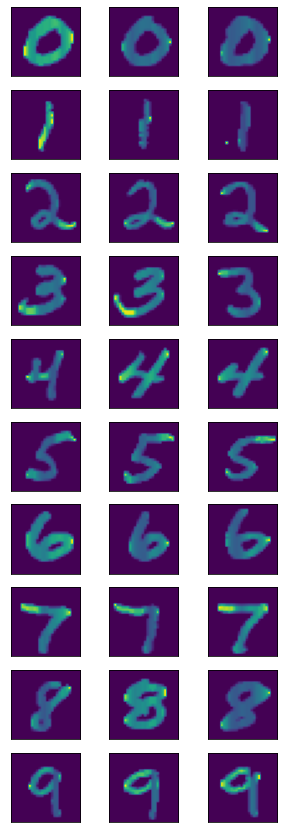

In [17]:
import matplotlib.pyplot as plt

pred_index = [ [0]*3 for i in range(10)]
hist = [ [0]*3 for i in range(10)]

def class_prior(X_test,Y_test):
  pred = model.predict([X_test])
  print(pred)
  for i in range(len(pred)):#처음부터시작
    if np.argmax(pred[i]) == Y_test[i]:
      if min(pred_index[Y_test[i]]) < pred[i][np.argmax(pred[i])]:
        pred_index[Y_test[i]][pred_index[Y_test[i]].index(min(pred_index[Y_test[i]]))] = pred[i][np.argmax(pred[i])] #확률 추가
        hist[Y_test[i]][pred_index[Y_test[i]].index(min(pred_index[Y_test[i]]))] = i #index
  print(len(pred_index), pred_index)
  print(len(hist), hist)
  new_hist = [ [0]*3 for i in range(10) ] 
  #역정렬
  for cl in range(len(pred_index)):
    new = sorted(pred_index[cl],reverse=True)
    for i in range(len(pred_index[cl])): #i가 원래 index
      new_index = new.index(pred_index[cl][i])
      new_hist[cl][new_index] = hist[cl][i]
  print(len(new_hist), new_hist)
        
  fig = plt.figure()#plt.subplots(figsize=(10,10))
  n = 1
  for i in new_hist:
    for j in range(len(i)):
      subplot = fig.add_subplot(10,3,n)
      n+=1
      image = X_test[i[j]].reshape((28,28))
      fig.set_figheight(15)
      fig.set_figwidth(5)
      subplot.imshow(image)
      # x, y 축의 지점 표시를 안함
      subplot.set_xticks([])
      subplot.set_yticks([])
  plt.show()

class_prior(X_test,Y_test)